# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [1]:
from sklearn.datasets import make_blobs

In [18]:
X,y = make_blobs(n_samples=1200, n_features=8, centers=7, cluster_std=8, random_state=1)

❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/home/arostagnat/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


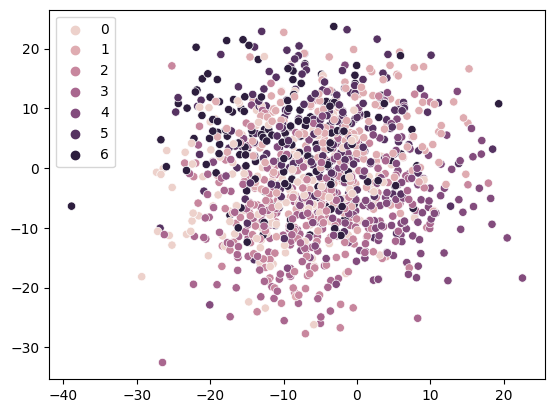

In [19]:
sns.scatterplot(X[:,2], X[:,3], hue=y);

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [5]:
from tensorflow.keras.utils import to_categorical

2023-02-20 13:51:17.134822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 13:51:18.097706: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-20 13:51:18.097748: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-20 13:51:18.227734: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-20 13:51:20.170641: W tensorflow/stream_executor/platform/de

In [20]:
y_cat = to_categorical(y)
y_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [11]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [13]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [66]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=8))
    model.add(layers.Dense(7, activation='softmax'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()

❓  How many parameters (a.k.a. weights) are there in the model ❓

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                450       
                                                                 
 dense_3 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [67]:
model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 2ms/step - loss: 1.9058 - accuracy: 0.2167
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 1.6898 - accuracy: 0.4131
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 1.5200 - accuracy: 0.5286
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 1.3763 - accuracy: 0.5917
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 1.2561 - accuracy: 0.6321
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 1.1566 - accuracy: 0.6583
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 1.0738 - accuracy: 0.6607
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 1.0071 - accuracy: 0.6762
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.9575 - accuracy: 0.6881
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.9153 - accuracy: 0.6940
Epoch 11/50
27/27 [

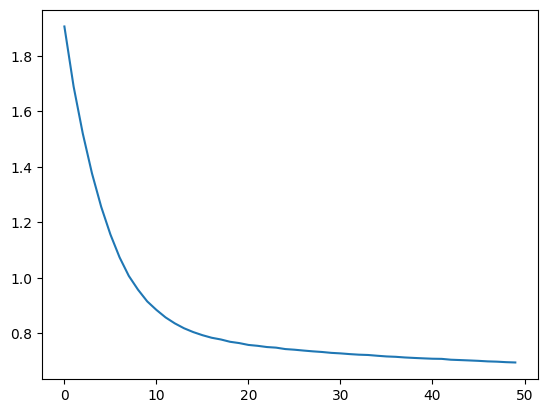

In [68]:
sns.lineplot(data = model.history.history["loss"]);

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [64]:
model.evaluate(X_test_scaled, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.8893 - accuracy: 0.6694


[0.8892701864242554, 0.6694444417953491]

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [73]:
import pandas as pd

In [74]:
pd.DataFrame(y).value_counts()

0    172
1    172
2    172
3    171
4    171
5    171
6    171
dtype: int64

In [76]:
accuracy_baseline = 1/7

🧪 **Test your code**

In [77]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/arostagnat/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/arostagnat/code/arostagnat/data-multiclass-classification/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [78]:
model.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.7345
Epoch 2/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.7369
Epoch 3/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.7345
Epoch 4/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.7452
Epoch 5/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.7405
Epoch 6/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.7393
Epoch 7/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.7440
Epoch 8/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.7429
Epoch 9/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.7440
Epoch 10/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.7417

27/27 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7643
Epoch 83/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.7643
Epoch 84/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.7643
Epoch 85/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.7631
Epoch 86/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.7607
Epoch 87/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.7679
Epoch 88/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7702
Epoch 89/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7690
Epoch 90/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.7702
Epoch 91/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7726
Epoc

27/27 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7905
Epoch 163/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7917
Epoch 164/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7881
Epoch 165/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.7881
Epoch 166/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.7893
Epoch 167/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7845
Epoch 168/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7905
Epoch 169/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7893
Epoch 170/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7845
Epoch 171/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7940
Epoch 243/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.7988
Epoch 244/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7964
Epoch 245/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.8036
Epoch 246/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7976
Epoch 247/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7917
Epoch 248/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7952
Epoch 249/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7940
Epoch 250/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7988
Epoch 251/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.8060
Epoch 323/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.8048
Epoch 324/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.8107
Epoch 325/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8024
Epoch 326/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.8048
Epoch 327/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8048
Epoch 328/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.8083
Epoch 329/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.8060
Epoch 330/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.8060
Epoch 331/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.8214
Epoch 403/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.8179
Epoch 404/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8155
Epoch 405/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8190
Epoch 406/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.8202
Epoch 407/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8238
Epoch 408/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8202
Epoch 409/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.8190
Epoch 410/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8190
Epoch 411/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8310
Epoch 483/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8345
Epoch 484/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8310
Epoch 485/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8333
Epoch 486/1000
27/27 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8369
Epoch 487/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8393
Epoch 488/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8345
Epoch 489/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8310
Epoch 490/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8345
Epoch 491/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8429
Epoch 563/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8393
Epoch 564/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8405
Epoch 565/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8405
Epoch 566/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8452
Epoch 567/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8452
Epoch 568/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8405
Epoch 569/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8452
Epoch 570/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8405
Epoch 571/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8595
Epoch 643/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8571
Epoch 644/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8571
Epoch 645/1000
27/27 [==============================] - 0s 4ms/step - loss: 0.3833 - accuracy: 0.8560
Epoch 646/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8583
Epoch 647/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8583
Epoch 648/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8619
Epoch 649/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8607
Epoch 650/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8607
Epoch 651/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8679
Epoch 723/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8679
Epoch 724/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8702
Epoch 725/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8631
Epoch 726/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8643
Epoch 727/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8726
Epoch 728/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8679
Epoch 729/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8702
Epoch 730/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8655
Epoch 731/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8726
Epoch 803/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.8714
Epoch 804/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8738
Epoch 805/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8738
Epoch 806/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8762
Epoch 807/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8762
Epoch 808/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8702
Epoch 809/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8714
Epoch 810/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8702
Epoch 811/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8833
Epoch 883/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8810
Epoch 884/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8762
Epoch 885/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8833
Epoch 886/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8845
Epoch 887/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8833
Epoch 888/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8845
Epoch 889/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8857
Epoch 890/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8881
Epoch 891/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8929
Epoch 963/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3025 - accuracy: 0.8905
Epoch 964/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8893
Epoch 965/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8905
Epoch 966/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8952
Epoch 967/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8917
Epoch 968/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8905
Epoch 969/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8952
Epoch 970/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8976
Epoch 971/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.

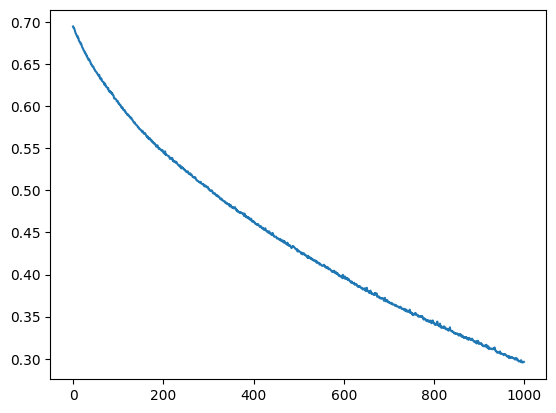

In [79]:
sns.lineplot(data = model.history.history["loss"]);

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [80]:
model.evaluate(X_test_scaled, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 1.7748 - accuracy: 0.5917


[1.774842381477356, 0.5916666388511658]

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

OVERFITTING

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

In [82]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

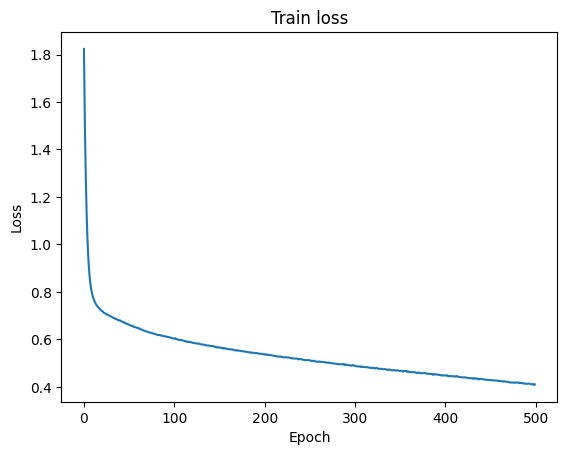

In [87]:
model = initialize_model()

history = model.fit(X_train_scaled, 
                    y_train, 
                    validation_data = (X_test_scaled, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

In [88]:
model.evaluate(X_test_scaled, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 1.3577 - accuracy: 0.6056


[1.3576561212539673, 0.605555534362793]

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [89]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

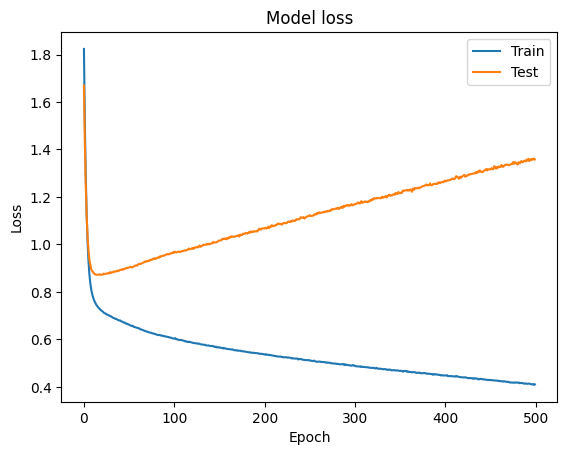

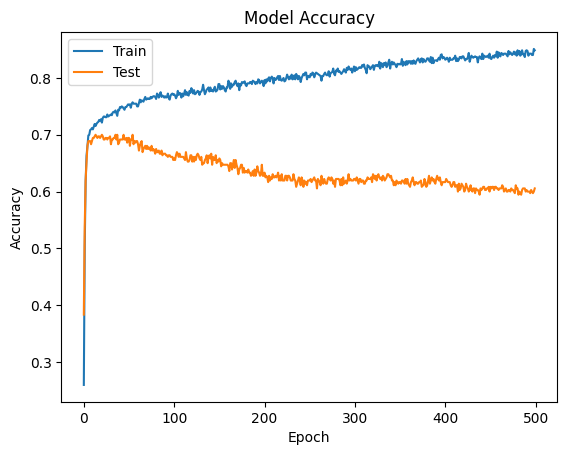

In [90]:
plot_loss_accuracy(history)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!